In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 150)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
#importing application data
df = pd.read_csv("application_data.csv")

In [3]:
#Taking a random sample of 1000 rows from entire dataset(using random_state parameter for reproducibility)
app_data = df.sample(n = 1000,random_state = 2)
app_data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
49103       156852       0         Cash loans           F            Y   
96031       211489       0         Cash loans           M            Y   
300915      448618       0         Cash loans           F            N   
260145      401051       0         Cash loans           F            N   
99054       215007       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
49103                N             3      126000.00000  888840.00000   
96031                N             0      225000.00000  360000.00000   
300915               Y             0      126000.00000  312768.00000   
260145               N             0      225000.00000 1096020.00000   
99054                Y             0      270000.00000 1288350.00000   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
49103   32053.50000     675000.00000   Unaccompanied               Working   
96031   30798.00000     360000.00000   Unaccompanied  Commercial associate   
300915  23382.00000     270000.00000   Unaccompanied             Pensioner   
260145  55962.00000     900000.00000   Unaccompanied               Working   
99054   37800.00000    1125000.00000   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
49103   Secondary / secondary special               Married   
96031   Secondary / secondary special  Single / not married   
300915  Secondary / secondary special                 Widow   
260145  Secondary / secondary special               Married   
99054   Secondary / secondary special        Civil marriage   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
49103    Rented apartment                     0.02262      -11222   
96031   House / apartment                     0.00918      -18005   
300915  House / apartment                     0.01885      -22581   
260145  House / apartment                     0.00847      -18573   
99054   House / apartment                     0.01885      -13238   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
49103            -721        -5197.00000            -2527      9.00000   
96031           -2354        -4816.00000            -1456      5.00000   
300915         365243        -5099.00000            -5098          nan   
260145          -2575        -8186.00000            -2092          nan   
99054            -125        -7362.00000            -4044          nan   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
49103            1               1                0                 1   
96031            1               1                1                 1   
300915           1               0                0                 1   
260145           1               1                1                 1   
99054            1               1                0                 1   

        FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
49103            0           0      Core staff          5.00000   
96031            1           0         Drivers          1.00000   
300915           0           0             NaN          1.00000   
260145           1           0  Security staff          2.00000   
99054            0           0        Laborers          2.00000   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
49103                      2                            2   
96031                      2                            2   
300915                     2                            2   
260145                     2                            2   
99054                      2                            2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
49103                    SATURDAY                       13   
96031                      FRIDAY                       12   
300915                     

In [4]:
#using Verbose parameter to view all the columns
app_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 49103 to 268609
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED        

In [5]:
#Checking missing values percentage for all the columns and listing down the columns with missing value percentage > 50
null_percentage = round((app_data.isnull().sum()/app_data.shape[0]), 2) * 100
columns_to_drop = null_percentage[null_percentage > 50]

In [6]:
#taking the columns which needed to be dropped in the form of a list
columns_to_drop = list(columns_to_drop.index)
columns_to_drop

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [7]:
#Dropping off the columns with missing value percentage > 50
app_data.drop(columns=columns_to_drop, inplace=True)

In [8]:
#Checking the null percentage of data less than 30%, so that we can take a decision based on that
null_percentage[(null_percentage > 0) & (null_percentage < 30)]

NAME_TYPE_SUITE               1.00000
EXT_SOURCE_3                 18.00000
AMT_REQ_CREDIT_BUREAU_HOUR   13.00000
AMT_REQ_CREDIT_BUREAU_DAY    13.00000
AMT_REQ_CREDIT_BUREAU_WEEK   13.00000
AMT_REQ_CREDIT_BUREAU_MON    13.00000
AMT_REQ_CREDIT_BUREAU_QRT    13.00000
AMT_REQ_CREDIT_BUREAU_YEAR   13.00000
dtype: float64

### Missing value checks
We are choosing only 5 columns out of 8 column which we got in the analysis to check for the columns having missing values less than 30 %

###### NAME_TYPE_SUITE
This is a Categorical Variable, we have 6 categories of data such as Unaccompanied contains '810', Family contains '126' and so on.
It would be suggested to use the Mode value "Unaccompanied" to impute the missing values.
###### AMT_REQ_CREDIT_BUREAU_HOUR
This is the Categorical value, we have 861 '0' values and 6 '1' values and 1 '2' vaues. It is clear that we have to use mode method which gives the result of '0'
So, imputing '0' for the missing value is the best method to use
###### AMT_REQ_CREDIT_BUREAU_DAY  
This is the Categorical value, we have 861 '0' values and 5 '1' values and 2 '2' values. It is clear that we have to use mode method which gives the result of '0'
So, imputing '0' for the missing value is the best method to use
###### AMT_REQ_CREDIT_BUREAU_WEEK
This is the count of enquaries make in the week before the application, we have most frequent value is '0' for 838 applications, '1' for 28 applications and '2' for two application. <br>
Hence instaed of taking this as continuous variable, we will be taking this as categorical variable. imputing the '0' value would be the best suggestion.    
###### AMT_REQ_CREDIT_BUREAU_YEAR    
This is the count of enquaries make in the previuos year of the application. <br>
Based on the values present in the column we will be considering this as continous variable and to impute the missing values we could use the mean method. <br>
The resulting mean value would be 2, so we can impute the mean value for the missing values

In [9]:
#Checking the value count for NAME_TYPE_SUITE column
app_data["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      810
Family             126
Spouse, partner     33
Children            15
Other_B              8
Other_A              2
Name: NAME_TYPE_SUITE, dtype: int64

In [10]:
#Cecking the value count for AMT_REQ_CREDIT_BUREAU_HOUR column
app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

0.00000    861
1.00000      6
2.00000      1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [11]:
#Checking the value count for AMT_REQ_CREDIT_BUREAU_DAY
app_data["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts()

0.00000    861
1.00000      5
2.00000      2
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [12]:
#Checking the value count for AMT_REQ_CREDIT_BUREAU_WEEK column
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.00000    838
1.00000     28
2.00000      2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [13]:
#Checking the value counts for AMT_REQ_CREDIT_BUREAU_YEAR column
print(app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts())
print("Mean = ",  np.ceil(app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].mean()))

0.00000    261
1.00000    195
2.00000    165
3.00000    104
4.00000     67
5.00000     29
6.00000     17
7.00000     14
8.00000      8
9.00000      8
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64
Mean =  2.0


In [14]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 49103 to 268609
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    1000 non-null   int64  
 1   TARGET                        1000 non-null   int64  
 2   NAME_CONTRACT_TYPE            1000 non-null   object 
 3   CODE_GENDER                   1000 non-null   object 
 4   FLAG_OWN_CAR                  1000 non-null   object 
 5   FLAG_OWN_REALTY               1000 non-null   object 
 6   CNT_CHILDREN                  1000 non-null   int64  
 7   AMT_INCOME_TOTAL              1000 non-null   float64
 8   AMT_CREDIT                    1000 non-null   float64
 9   AMT_ANNUITY                   1000 non-null   float64
 10  AMT_GOODS_PRICE               999 non-null    float64
 11  NAME_TYPE_SUITE               994 non-null    object 
 12  NAME_INCOME_TYPE              1000 non-null   object 
 1

In [15]:
#Checking the Distinct Count of observations
app_data.nunique()

SK_ID_CURR                      1000
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                       4
AMT_INCOME_TOTAL                  90
AMT_CREDIT                       423
AMT_ANNUITY                      760
AMT_GOODS_PRICE                  166
NAME_TYPE_SUITE                    6
NAME_INCOME_TYPE                   5
NAME_EDUCATION_TYPE                4
NAME_FAMILY_STATUS                 5
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        77
DAYS_BIRTH                       966
DAYS_EMPLOYED                    777
DAYS_REGISTRATION                950
DAYS_ID_PUBLISH                  901
FLAG_MOBIL                         1
FLAG_EMP_PHONE                     2
FLAG_WORK_PHONE                    2
FLAG_CONT_MOBILE                   2
FLAG_PHONE                         2
FLAG_EMAIL                         2
O

### data type change
- DAYS_REGISTRATION
- CNT_FAM_MEMBERS
- DAYS_LAST_PHONE_CHANGE

### Identified flag variables with flag values 0,1

1.  FLAG_MOBIL                         
2.  FLAG_EMP_PHONE                     
3.  FLAG_WORK_PHONE                    
4.  FLAG_CONT_MOBILE                  
5.  FLAG_PHONE                         
6.  FLAG_EMAIL
7.  FLAG_DOCUMENT_2                    
8.  FLAG_DOCUMENT_3                    
9.  FLAG_DOCUMENT_4                    
10. FLAG_DOCUMENT_5                    
11. FLAG_DOCUMENT_6                    
12. FLAG_DOCUMENT_7                    
13. FLAG_DOCUMENT_8                    
14. FLAG_DOCUMENT_9                    
15. FLAG_DOCUMENT_10                   
16. FLAG_DOCUMENT_11                   
17. FLAG_DOCUMENT_12                   
18. FLAG_DOCUMENT_13                   
19. FLAG_DOCUMENT_14                   
20. FLAG_DOCUMENT_15                   
21. FLAG_DOCUMENT_16                   
22. FLAG_DOCUMENT_17                   
23. FLAG_DOCUMENT_18                   
24. FLAG_DOCUMENT_19                   
25. FLAG_DOCUMENT_20                   
26. FLAG_DOCUMENT_21                   

In [16]:
# Converting the flag variables to object type

flag_cols = list()
for col in list(app_data.columns):
    if col.startswith("FLAG"):
        flag_cols.append(col)
flag_cols

app_data.loc[:,flag_cols] = app_data.loc[:,flag_cols].apply(lambda x : x.astype(str))
app_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 49103 to 268609
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    1000 non-null   int64  
 1   TARGET                        1000 non-null   int64  
 2   NAME_CONTRACT_TYPE            1000 non-null   object 
 3   CODE_GENDER                   1000 non-null   object 
 4   FLAG_OWN_CAR                  1000 non-null   object 
 5   FLAG_OWN_REALTY               1000 non-null   object 
 6   CNT_CHILDREN                  1000 non-null   int64  
 7   AMT_INCOME_TOTAL              1000 non-null   float64
 8   AMT_CREDIT                    1000 non-null   float64
 9   AMT_ANNUITY                   1000 non-null   float64
 10  AMT_GOODS_PRICE               999 non-null    float64
 11  NAME_TYPE_SUITE               994 non-null    object 
 12  NAME_INCOME_TYPE              1000 non-null   object 
 1

### Identified flag variables with Flag values 1,2,3

1. REGION_RATING_CLIENT               
2. REGION_RATING_CLIENT_W_CITY        
3. REG_REGION_NOT_LIVE_REGION
4. REG_REGION_NOT_WORK_REGION
5. LIVE_REGION_NOT_WORK_REGION
6. REG_CITY_NOT_LIVE_CITY
7. REG_CITY_NOT_WORK_CITY
8. LIVE_CITY_NOT_WORK_CITY


In [17]:
# Converting the flag variables to object type
temp_col_list = ["REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
                "LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"]
app_data.loc[:,temp_col_list] = app_data.loc[:,temp_col_list].apply(lambda x : x.astype(str))
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 49103 to 268609
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    1000 non-null   int64  
 1   TARGET                        1000 non-null   int64  
 2   NAME_CONTRACT_TYPE            1000 non-null   object 
 3   CODE_GENDER                   1000 non-null   object 
 4   FLAG_OWN_CAR                  1000 non-null   object 
 5   FLAG_OWN_REALTY               1000 non-null   object 
 6   CNT_CHILDREN                  1000 non-null   int64  
 7   AMT_INCOME_TOTAL              1000 non-null   float64
 8   AMT_CREDIT                    1000 non-null   float64
 9   AMT_ANNUITY                   1000 non-null   float64
 10  AMT_GOODS_PRICE               999 non-null    float64
 11  NAME_TYPE_SUITE               994 non-null    object 
 12  NAME_INCOME_TYPE              1000 non-null   object 
 1

In [18]:
#Changing the Data type to integer
#app_data['DAYS_REGISTRATION'] = np.ceil(abs(app_data['DAYS_REGISTRATION']))
#pd.to_numeric#(app_data['DAYS_REGISTRATION'], errors = 'coerce')
app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].astype(int)

In [19]:
app_data["CNT_FAM_MEMBERS"] = app_data["CNT_FAM_MEMBERS"].astype(int)
app_data["CNT_FAM_MEMBERS"]

49103     5
96031     1
300915    1
260145    2
99054     2
         ..
269055    2
163574    3
12441     2
151291    2
268609    2
Name: CNT_FAM_MEMBERS, Length: 1000, dtype: int32

In [20]:
app_data["DAYS_LAST_PHONE_CHANGE"] = abs(app_data["DAYS_LAST_PHONE_CHANGE"].astype(int))
app_data["DAYS_LAST_PHONE_CHANGE"]

49103     1493
96031     1587
300915     587
260145    2062
99054      683
          ... 
269055    1001
163574     846
12441      972
151291     173
268609     476
Name: DAYS_LAST_PHONE_CHANGE, Length: 1000, dtype: int32

In [21]:
app_data["DAYS_BIRTH"] = abs(app_data["DAYS_BIRTH"].astype(int))
app_data["DAYS_EMPLOYED"] = abs(app_data["DAYS_EMPLOYED"].astype(int))

### We have choosed the following columns to do the outlier analysis
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_GOODS_PRICE
- DAYS_EMPLOYED
- DAYS_ID_PUBLISH

**AMT_INCOME_TOTAL** is the income of the applicant, from the box plot we have plotted below we observed that there are outliers.<br>
Difference between the 75th quantile and max value is very high, about 99 percentile of applicants have the income below 5L and only 1 percentile of applicants<br>
As only 10 applicants have higher income/ income above 5L binning these outliers is suggested option

In [22]:
# Looking at the quantile wise values for understanding outliers
print(app_data["AMT_INCOME_TOTAL"].describe())
print(app_data["AMT_INCOME_TOTAL"].quantile([0.80,0.85,0.90,0.95,0.97,0.99]))
(app_data["AMT_INCOME_TOTAL"]> 500000).sum()

count      1000.00000
mean     164043.92250
std       90659.04776
min       27000.00000
25%      112500.00000
50%      135000.00000
75%      202500.00000
max     1009368.00000
Name: AMT_INCOME_TOTAL, dtype: float64
0.80000   216000.00000
0.85000   225000.00000
0.90000   270000.00000
0.95000   315000.00000
0.97000   382500.00000
0.99000   450900.00000
Name: AMT_INCOME_TOTAL, dtype: float64


10

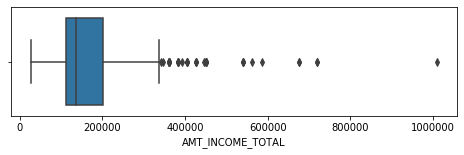

In [23]:
#Plotting the box plot for visual representation of outiers
plt.figure(figsize=[8,2])
sns.boxplot(app_data["AMT_INCOME_TOTAL"])
plt.ticklabel_format(style = 'plain',axis  = 'x', useOffset=False)
plt.show()

**AMT_CREDIT** Column contains the data of Credit amount of the loan. Through the outlier analysis from the box plot we have found that "AMT_CREDIT" column has the outliers of about 1 percentile <br>
Thses outliers would be the applicants who draw more income (might be the outliers present in the "AMT_INCOME_TOTAL" column) <br>
The outliers were seen for the Credit amount of the loan of around 1725062 and more than that, so it would be suggested to bin these outliers.

In [24]:
print(app_data["AMT_CREDIT"].describe())
print(app_data["AMT_CREDIT"].quantile([0.80,0.85,0.90,0.95,0.97,0.99]))
print((app_data["AMT_CREDIT"]>1725062.22000).value_counts())

count      1000.00000
mean     585273.66300
std      387221.52130
min       50940.00000
25%      270000.00000
50%      497520.00000
75%      808650.00000
max     2517300.00000
Name: AMT_CREDIT, dtype: float64
0.80000    900000.00000
0.85000   1024290.00000
0.90000   1125000.00000
0.95000   1312110.00000
0.97000   1436850.00000
0.99000   1725062.22000
Name: AMT_CREDIT, dtype: float64
False    990
True      10
Name: AMT_CREDIT, dtype: int64


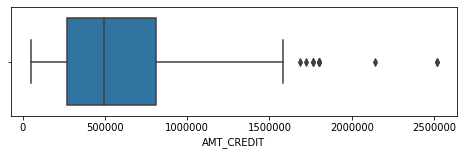

In [25]:
plt.figure(figsize=[8,2])
sns.boxplot(app_data["AMT_CREDIT"])
plt.ticklabel_format(style = 'plain',axis  = 'x', useOffset=False)
plt.show()

In the column **AMT_GOODS_PRICE** we have the price of the goods for which the loan is given, from the boxplot we have observed the presence of the outliers.<br>
The outliers are present above 97th percentile where there are around 21 value count whose values lies between 1350000 (97th percentile) to 2250000 (max) <br>
It would be suggested to do bin these for these values as 'very high price goods'.

In [26]:
print(app_data["AMT_GOODS_PRICE"].describe())
print(app_data["AMT_GOODS_PRICE"].quantile([0.80,0.85,0.90,0.95,0.97,0.99]))
print((app_data["AMT_GOODS_PRICE"]>1350000).sum())

count       999.00000
mean     527217.80631
std      353749.60495
min       45000.00000
25%      238500.00000
50%      450000.00000
75%      679500.00000
max     2250000.00000
Name: AMT_GOODS_PRICE, dtype: float64
0.80000    810000.00000
0.85000    900000.00000
0.90000   1031400.00000
0.95000   1140750.00000
0.97000   1350000.00000
0.99000   1575000.00000
Name: AMT_GOODS_PRICE, dtype: float64
21


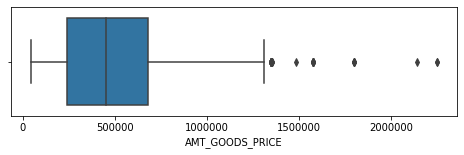

In [27]:
plt.figure(figsize=[8,2])
sns.boxplot(app_data["AMT_GOODS_PRICE"])
plt.ticklabel_format(style = 'plain',axis  = 'x', useOffset=False)
plt.show()

**DAYS_EMPLOYED** provides the data about How many days before the application the person started current employment <br>
From the outlier analysis we found that the data has outlier values after 80th percentile.<br>
"DAYS_EMPLOYED" data is converted into the values in year for the ease of anlysis and found that the data above 30 years are all same and not valid.<br>
Hence it is suggested to replace this invalid data with np.NAN values

In [28]:
print(abs(app_data["DAYS_EMPLOYED"]/365).describe()) # The negative sign in the value indicates that the days were counted before the application, hence taking the absolute values for the analysis purpose.
print(abs(app_data["DAYS_EMPLOYED"]/365).quantile([0.80,0.85,0.90,0.95,0.97,0.99]))
(abs(app_data["DAYS_EMPLOYED"]/365) > 30).value_counts()
app_data["DAYS_EMPLOYED"][abs(app_data["DAYS_EMPLOYED"]/365) > 30]

count   1000.00000
mean     169.85920
std      368.21235
min        0.08493
25%        2.56301
50%        6.19178
75%       15.47740
max     1000.66575
Name: DAYS_EMPLOYED, dtype: float64
0.80000     22.04603
0.85000   1000.66575
0.90000   1000.66575
0.95000   1000.66575
0.97000   1000.66575
0.99000   1000.66575
Name: DAYS_EMPLOYED, dtype: float64


300915    365243
22798     365243
194673    365243
6095      365243
256532    365243
289898    365243
222263    365243
20257      11149
43470     365243
211788     12647
277051    365243
187391    365243
259304    365243
117539    365243
245403    365243
256899     13376
76001     365243
154383    365243
53048     365243
302040    365243
171297    365243
10417     365243
238569    365243
274000    365243
251267    365243
89847     365243
53810     365243
282141    365243
271766    365243
225289    365243
89657     365243
292679    365243
202648    365243
113288    365243
166605    365243
138891    365243
25475     365243
263189    365243
262800    365243
264877    365243
212294    365243
270338    365243
190077    365243
196137    365243
265272    365243
164346    365243
186597    365243
258033    365243
95503     365243
121901    365243
194048    365243
64956     365243
165825    365243
278902    365243
257739    365243
272115    365243
302309    365243
103386    365243
93334     3652

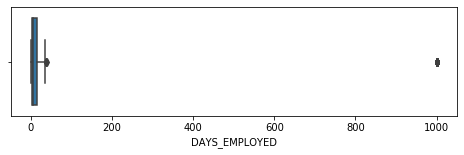

In [29]:
plt.figure(figsize=[8,2])
sns.boxplot(abs(app_data["DAYS_EMPLOYED"])/365)
plt.ticklabel_format(style = 'plain',axis  = 'x', useOffset=False)
plt.show()

*No outliers observed in this column*

In [30]:
print(abs(app_data["DAYS_ID_PUBLISH"]).describe())
print(abs(app_data["DAYS_ID_PUBLISH"]).quantile([0.80,0.85,0.90,0.95,0.97,0.99]))
##print((app_data["DAYS_BIRTH"]>64415).sum())

count   1000.00000
mean    3012.35800
std     1525.48581
min        6.00000
25%     1654.50000
50%     3371.50000
75%     4336.25000
max     6053.00000
Name: DAYS_ID_PUBLISH, dtype: float64
0.80000   4470.00000
0.85000   4601.30000
0.90000   4718.00000
0.95000   4939.35000
0.97000   5083.18000
0.99000   5500.29000
Name: DAYS_ID_PUBLISH, dtype: float64


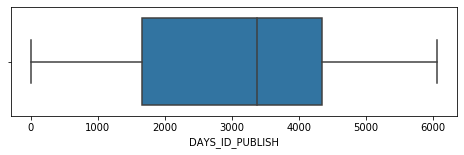

In [31]:
plt.figure(figsize=[8,2])
sns.boxplot(abs(app_data["DAYS_ID_PUBLISH"]))
plt.ticklabel_format(style = 'plain',axis  = 'x', useOffset=False)
plt.show()

### Binning of outliers
Choosing two colums for binning 
1. AMT_INCOME_TOTAL <br>
Binned the income in to 6 categories as <1L, 1L to 2L, ...., >5L
2. DAYS_BIRTH <br>
Binned the age in to 6 categories as < 20, 20 - 30, ......., >60

In [32]:
#Binning for AMT_INCOME_TOTAL column
app_data['AMT_INCOME_TOTAL_binned'] = pd.cut(app_data['AMT_INCOME_TOTAL'], bins = [0,100000,200000,300000,400000,500000,99999999], labels = ["<1L", "1L - 2L", "2L - 3L", "3L - 4L","4L - 5L",">5L"])
app_data.loc[:,["AMT_INCOME_TOTAL", "AMT_INCOME_TOTAL_binned"]]#Binning for AMT_INCOME_TOTAL column
app_data['AMT_INCOME_TOTAL_binned'] = pd.cut(app_data['AMT_INCOME_TOTAL'], bins = [0,100000,200000,300000,400000,500000,99999999], labels = ["<1L", "1L - 2L", "2L - 3L", "3L - 4L","4L - 5L",">5L"])
app_data.loc[:,["AMT_INCOME_TOTAL", "AMT_INCOME_TOTAL_binned"]]

AMT_INCOME_TOTAL AMT_INCOME_TOTAL_binned
49103       126000.00000                 1L - 2L
96031       225000.00000                 2L - 3L
300915      126000.00000                 1L - 2L
260145      225000.00000                 2L - 3L
99054       270000.00000                 2L - 3L
...                  ...                     ...
269055      180000.00000                 1L - 2L
163574      180000.00000                 1L - 2L
12441       112500.00000                 1L - 2L
151291       90000.00000                     <1L
268609      180000.00000                 1L - 2L

[1000 rows x 2 columns]

In [33]:
#Binning for DAYS_BIRTH column
app_data["DAYS_BIRTH_binned"] = pd.cut(np.ceil(abs(app_data["DAYS_BIRTH"])/365), bins=[0,20,30,45,50,60,999], labels=["<20","20 - 30","30 - 40","40 - 50", "50 - 60", ">60"])
app_data.loc[:,["DAYS_BIRTH", "DAYS_BIRTH_binned"]]#Binning for DAYS_BIRTH column
app_data["DAYS_BIRTH_binned"] = pd.cut(np.ceil(abs(app_data["DAYS_BIRTH"])/365), bins=[0,20,30,45,50,60,999], labels=["<20","20 - 30","30 - 40","40 - 50", "50 - 60", ">60"])
app_data.loc[:,["DAYS_BIRTH", "DAYS_BIRTH_binned"]]

DAYS_BIRTH DAYS_BIRTH_binned
49103        11222           30 - 40
96031        18005           40 - 50
300915       22581               >60
260145       18573           50 - 60
99054        13238           30 - 40
...            ...               ...
269055       17116           40 - 50
163574       12661           30 - 40
12441        20161           50 - 60
151291       19369           50 - 60
268609       14512           30 - 40

[1000 rows x 2 columns]

### Imbalance percentage of data (TARGET variable)

- 92% data is of all other clients
- Rest 8% of data is of clients with payment difficulties

In [34]:
#Checking the imbalance percentage 
100*(app_data["TARGET"].value_counts()/app_data.shape[0])

0   92.00000
1    8.00000
Name: TARGET, dtype: float64

### Dividing the data into two datasets based on TARGET column

In [35]:
df_1 = app_data[app_data['TARGET']== 1]
df_0 = app_data[app_data['TARGET']== 0]

In [36]:
#Checking the correlation between columns
corr_1 = df_1.corr()
corr_df_1 = corr_1.where(np.triu(np.ones(corr_1.shape), k=1).astype(np.bool))
corr_df_1 = corr_df_1.unstack().reset_index().dropna(subset = [0])
corr_df_1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df_1['Corr_abs'] = abs(corr_df_1['Correlation_Value'])
corr_df_1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df_1.head(15)

VAR1                          VAR2  \
574  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG   
702      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE   
543  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG   
575  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE   
190               AMT_GOODS_PRICE                    AMT_CREDIT   
734      DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE   
374               CNT_FAM_MEMBERS                  CNT_CHILDREN   
191               AMT_GOODS_PRICE                   AMT_ANNUITY   
159                   AMT_ANNUITY                    AMT_CREDIT   
287                 DAYS_EMPLOYED                    DAYS_BIRTH   
607                TOTALAREA_MODE  YEARS_BEGINEXPLUATATION_MEDI   
605                TOTALAREA_MODE   YEARS_BEGINEXPLUATATION_AVG   
250                    DAYS_BIRTH                  CNT_CHILDREN   
158                   AMT_ANNUITY              AMT_INCOME_TOTAL   
380               CNT_FAM_MEMBERS                    DAYS_BIRTH   

     Correlation_Value  Corr_abs  
574            1.00000   1.00000  
702            1.00000   1.00000  
543            0.99209   0.99209  
575            0.99209   0.99209  
190            0.98245   0.98245  
734            0.90222   0.90222  
374            0.90167   0.90167  
191            0.73040   0.73040  
159            0.72919   0.72919  
287            0.47961   0.47961  
607            0.44616   0.44616  
605            0.44616   0.44616  
250           -0.43699   0.43699  
158            0.41528   0.41528  
380           -0.41424   0.41424

In [37]:
corr_0 = df_0.corr()
corr_df_0 = corr_0.where(np.triu(np.ones(corr_0.shape), k=1).astype(np.bool))
corr_df_0 = corr_df_0.unstack().reset_index().dropna(subset = [0])
corr_df_0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df_0['Corr_abs'] = abs(corr_df_0['Correlation_Value'])
corr_df_0.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df_0.head(15)

VAR1                          VAR2  \
574  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG   
702      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE   
190               AMT_GOODS_PRICE                    AMT_CREDIT   
543  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG   
575  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE   
734      DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE   
374               CNT_FAM_MEMBERS                  CNT_CHILDREN   
191               AMT_GOODS_PRICE                   AMT_ANNUITY   
159                   AMT_ANNUITY                    AMT_CREDIT   
287                 DAYS_EMPLOYED                    DAYS_BIRTH   
158                   AMT_ANNUITY              AMT_INCOME_TOTAL   
189               AMT_GOODS_PRICE              AMT_INCOME_TOTAL   
127                    AMT_CREDIT              AMT_INCOME_TOTAL   
318             DAYS_REGISTRATION                    DAYS_BIRTH   
250                    DAYS_BIRTH                  CNT_CHILDREN   

     Correlation_Value  Corr_abs  
574            0.99958   0.99958  
702            0.99791   0.99791  
190            0.98572   0.98572  
543            0.94747   0.94747  
575            0.94587   0.94587  
734            0.90932   0.90932  
374            0.86363   0.86363  
191            0.78451   0.78451  
159            0.78155   0.78155  
287            0.60324   0.60324  
158            0.46536   0.46536  
189            0.41962   0.41962  
127            0.40699   0.40699  
318           -0.38113   0.38113  
250           -0.35812   0.35812

### Column choosed for the Univariate numerical Analysis among the top 15 correlated variables
1. AMT_CREDIT
2. DEF_30_CNT_SOCIAL_CIRCLE
3. AMT_INCOME_TOTAL
4. DAYS_EMPLOYED
5. DAYS_BIRTH
6. CNT_FAM_MEMBERS
7. CNT_CHILDREN

### Taking a subset of data with 20 - 25 columns for performing analysis
- TARGET
- CODE_GENDER
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- CNT_CHILDREN
- AMT_INCOME_TOTAL
- AMT_CREDIT
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_HOUSING_TYPE
- DAYS_BIRTH
- DAYS_EMPLOYED
- FLAG_MOBIL
- FLAG_CONT_MOBILE
- OCCUPATION_TYPE
- CNT_FAM_MEMBERS
- WEEKDAY_APPR_PROCESS_START
- REG_REGION_NOT_LIVE_REGION
- ORGANIZATION_TYPE
- DEF_30_CNT_SOCIAL_CIRCLE
- DAYS_LAST_PHONE_CHANGE
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_INCOME_TOTAL_binned
- DAYS_BIRTH_binned

In [38]:
#Taking a subset of above menioned columns from df_1 and df_0
df_1 = df_1.iloc[:,[1,3,4,5,6,7,8,12,13,15,17,18,21,24,27,28,29,31,33,39,48,51,75,78,79]]
df_0 = df_0.iloc[:,[1,3,4,5,6,7,8,12,13,15,17,18,21,24,27,28,29,31,33,39,48,51,75,78,79]]

In [39]:
df_1.head()

TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
154281       1           F            N               Y             0   
289898       1           M            Y               Y             0   
218272       1           M            Y               Y             0   
59752        1           F            N               N             2   
301462       1           M            N               Y             0   

        AMT_INCOME_TOTAL    AMT_CREDIT      NAME_INCOME_TYPE  \
154281      382500.00000  563269.50000  Commercial associate   
289898      180000.00000 1546020.00000             Pensioner   
218272      157500.00000  440784.00000               Working   
59752        76500.00000  634482.00000               Working   
301462      157500.00000  745119.00000  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_HOUSING_TYPE  DAYS_BIRTH  \
154281  Secondary / secondary special  Municipal apartment       17133   
289898  Secondary / secondary special    House / apartment       12578   
218272  Secondary / secondary special    House / apartment       20493   
59752   Secondary / secondary special         With parents        9998   
301462  Secondary / secondary special    House / apartment       18551   

        DAYS_EMPLOYED FLAG_MOBIL FLAG_CONT_MOBILE OCCUPATION_TYPE  \
154281           3737          1                1  Medicine staff   
289898         365243          1                1             NaN   
218272           3256          1                1        Laborers   
59752             466          1                1  Cleaning staff   
301462            934          1                1   Cooking staff   

        CNT_FAM_MEMBERS REGION_RATING_CLIENT WEEKDAY_APPR_PROCESS_START  \
154281                1                    1                     MONDAY   
289898                2                    3                     FRIDAY   
218272                2                    2                    TUESDAY   
59752                 4                    3                   THURSDAY   
301462                2                    2                  WEDNESDAY   

       REG_REGION_NOT_LIVE_REGION       ORGANIZATION_TYPE  \
154281                          0                Medicine   
289898                          0                     XNA   
218272                          0           Self-employed   
59752                           0  Business Entity Type 2   
301462                          0  Business Entity Type 3   

        DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
154281                   0.00000                    1171   
289898                   0.00000                    1815   
218272                   0.00000                       1   
59752                    0.00000                    1001   
301462                   0.00000                     510   

        AMT_REQ_CREDIT_BUREAU_MON AMT_INCOME_TOTAL_binned DAYS_BIRTH_binned  
154281                    0.00000                 3L - 4L           40 - 50  
289898                    0.00000                 1L - 2L           30 - 40  
218272                    1.00000                 1L - 2L           50 - 60  
59752                     0.00000                     <1L           20 - 30  
301462                    0.00000                 1L - 2L           50 - 60

In [40]:
df_0.head()

TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
49103        0           F            Y               N             3   
96031        0           M            Y               N             0   
300915       0           F            N               Y             0   
260145       0           F            N               N             0   
99054        0           M            N               Y             0   

        AMT_INCOME_TOTAL    AMT_CREDIT      NAME_INCOME_TYPE  \
49103       126000.00000  888840.00000               Working   
96031       225000.00000  360000.00000  Commercial associate   
300915      126000.00000  312768.00000             Pensioner   
260145      225000.00000 1096020.00000               Working   
99054       270000.00000 1288350.00000               Working   

                  NAME_EDUCATION_TYPE  NAME_HOUSING_TYPE  DAYS_BIRTH  \
49103   Secondary / secondary special   Rented apartment       11222   
96031   Secondary / secondary special  House / apartment       18005   
300915  Secondary / secondary special  House / apartment       22581   
260145  Secondary / secondary special  House / apartment       18573   
99054   Secondary / secondary special  House / apartment       13238   

        DAYS_EMPLOYED FLAG_MOBIL FLAG_CONT_MOBILE OCCUPATION_TYPE  \
49103             721          1                1      Core staff   
96031            2354          1                1         Drivers   
300915         365243          1                1             NaN   
260145           2575          1                1  Security staff   
99054             125          1                1        Laborers   

        CNT_FAM_MEMBERS REGION_RATING_CLIENT WEEKDAY_APPR_PROCESS_START  \
49103                 5                    2                   SATURDAY   
96031                 1                    2                     FRIDAY   
300915                1                    2                     FRIDAY   
260145                2                    2                     MONDAY   
99054                 2                    2                  WEDNESDAY   

       REG_REGION_NOT_LIVE_REGION       ORGANIZATION_TYPE  \
49103                           0                  School   
96031                           0           Self-employed   
300915                          0                     XNA   
260145                          0            Kindergarten   
99054                           0  Business Entity Type 3   

        DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
49103                    0.00000                    1493   
96031                    0.00000                    1587   
300915                   0.00000                     587   
260145                   0.00000                    2062   
99054                    0.00000                     683   

        AMT_REQ_CREDIT_BUREAU_MON AMT_INCOME_TOTAL_binned DAYS_BIRTH_binned  
49103                     0.00000                 1L - 2L           30 - 40  
96031                     0.00000                 2L - 3L           40 - 50  
300915                    0.00000                 1L - 2L               >60  
260145                    0.00000                 2L - 3L           50 - 60  
99054                     0.00000                 2L - 3L           30 - 40

## Univariate Analysis - Continous variables

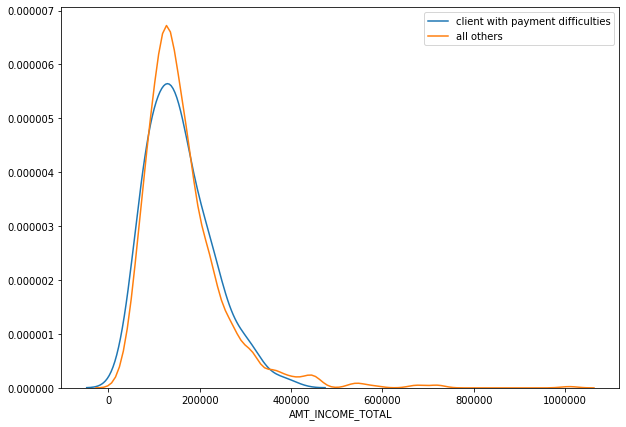

In [41]:
#Univariate analysis for AMT_INCOME_TOTAL using distplot
plt.figure(figsize=(10,7))
sns.distplot(df_1["AMT_INCOME_TOTAL"],hist=False,label='client with payment difficulties')
sns.distplot(df_0["AMT_INCOME_TOTAL"],hist=False,label='all others')
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

# All the applicants with higher income dont have any difficulty in repaying the loan, applicants with income below 4L are facing difficulty in repaying the loan amount

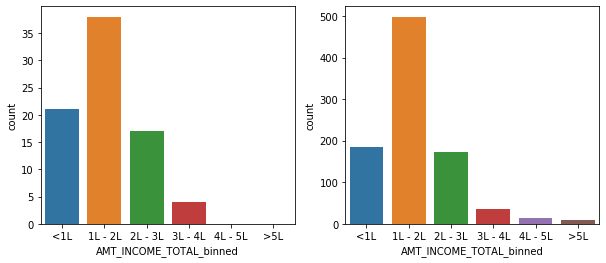

In [42]:
#Univariate analysis for AMT_INCOME_TOTAL using countplot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = "AMT_INCOME_TOTAL_binned", data = df_1)
plt.subplot(1,2,2)
sns.countplot(x = "AMT_INCOME_TOTAL_binned", data = df_0)
# Clients with payment difficluties have incomes in the range of 0 to 4 Lakhs,
# where all other cleints varied salaries, but most of them lie in 1L - 2L range

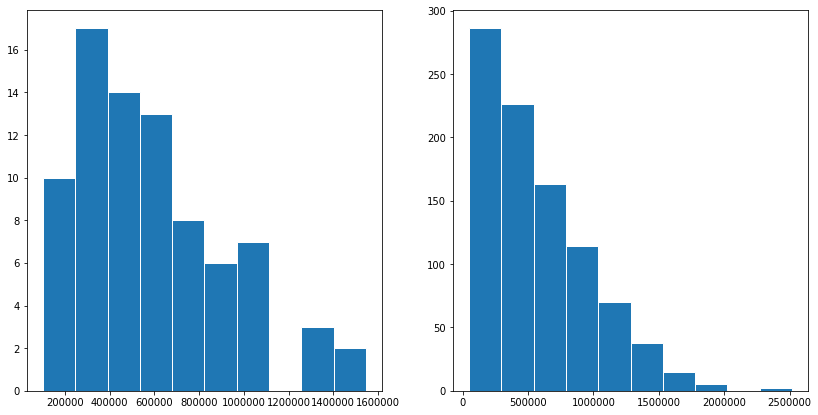

In [43]:
#Univariate analysis for AMT_CREDIT using Histogram
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.hist(df_1["AMT_CREDIT"], edgecolor = 'white')
plt.subplot(1,2,2)
plt.hist(df_0["AMT_CREDIT"], edgecolor= 'white')
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()
# Clients with paymnet difficulties has requested for loan less than 10 Lakhs and a very few clients requested around 15 Lakhs.
# ALl other clients - More than 50% of the loans have credit amount less than 5 Lakhs and for a few it went as high as 25 Lakhs

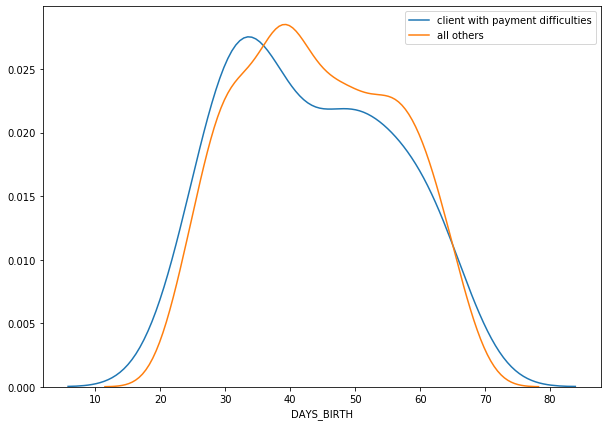

In [44]:
#Univariate analysis for DAYS_BIRTH coulmn using distribution plot
plt.figure(figsize=(10,7))
sns.distplot(df_1["DAYS_BIRTH"]/365,hist=False,label='client with payment difficulties') #dividing by 365 to convert into years
sns.distplot(df_0["DAYS_BIRTH"]/365,hist=False,label='all others')
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

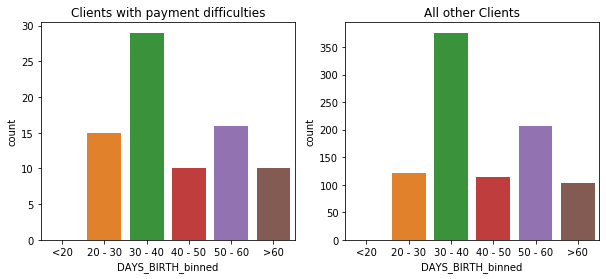

In [112]:
#Using the binned values for precise visuals 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Clients with payment difficulties")
sns.countplot(x = "DAYS_BIRTH_binned", data = df_1)
plt.subplot(1,2,2)
plt.title("All other Clients")
sns.countplot(x = "DAYS_BIRTH_binned", data = df_0)
plt.show()
#Either it is clients with/without payment difficulties, most of the loans are applied by age group of 30 - 40
# Followed by 50 - 60 age group and greater than 60 age group.

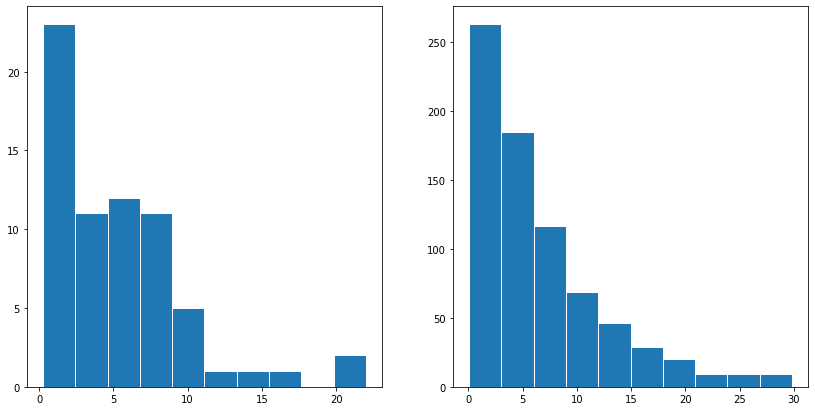

In [46]:
#Treating outliers reported in outlier analysis.
#Instead of chaanging values in entire dataset, changing here for the subset of values we took
df_0["DAYS_EMPLOYED"] = df_0["DAYS_EMPLOYED"].apply(lambda x : np.NaN if x/365 > 30 else x)
df_1["DAYS_EMPLOYED"] = df_1["DAYS_EMPLOYED"].apply(lambda x : np.NaN if x/365 > 30 else x)

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.hist(df_1["DAYS_EMPLOYED"]/365, edgecolor = 'white')
plt.subplot(1,2,2)
plt.hist(df_0["DAYS_EMPLOYED"]/365, edgecolor= 'white')
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

#Clients with payment difficulties have experience ranging from 0 to 10 and a few have 15 to 20 years. 
# All other cases have varying experience with more people have 0 to 5 and seeing a decreasing trend till 30 years of experience

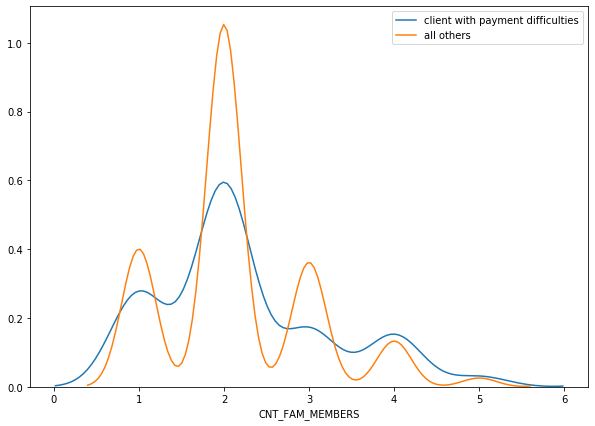

In [47]:
# outlier analysis for CNT_FAM_MEMBERS using distribution plot
df_1["CNT_FAM_MEMBERS"]=np.ceil(df_1["CNT_FAM_MEMBERS"])
df_0["CNT_FAM_MEMBERS"]=np.ceil(df_0["CNT_FAM_MEMBERS"])
plt.figure(figsize=(10,7))
sns.distplot(df_1["CNT_FAM_MEMBERS"],hist=False,label='client with payment difficulties')
sns.distplot(df_0["CNT_FAM_MEMBERS"],hist=False,label='all others')
plt.show()

# Most of the clients who had applied for the loan has the family member cpunt as 2 in both the cases with/without difficulty in paying the loan
# May be these applicatns are newly married couples, who would be applying to expand the poperty

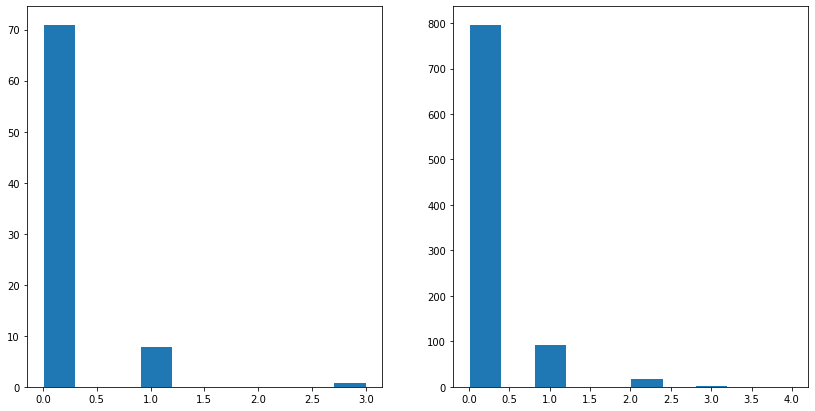

In [48]:
#outlier analysis for DEF_30_CNT_SOCIAL_CIRCLE using histogram
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.hist(df_1["DEF_30_CNT_SOCIAL_CIRCLE"], edgecolor = 'white')
plt.subplot(1,2,2)
plt.hist(df_0["DEF_30_CNT_SOCIAL_CIRCLE"], edgecolor= 'white')
plt.show()

# In only few cases there are people who got defaulted in 30 DPD in clients social area, in most of the cases there are zero defaulters

### Univariate - Categorical Analysis

FLAG_OWN_REALTY <br>
NAME_EDUCATION_TYPE <br>
NAME_INCOME_TYPE <br>
OCCUPATION_TYPE <br>
REG_REGION_NOT_LIVE_REGION

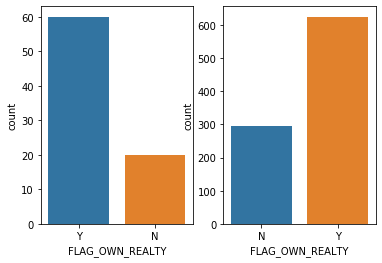

In [49]:
#Univariate analysis for FLAG_OWN_REALTY using countplot
plt.subplot(1,2,1)
sns.countplot(df_1["FLAG_OWN_REALTY"])

plt.subplot(1,2,2)
sns.countplot(df_0["FLAG_OWN_REALTY"])
plt.show()

# In both with/ without difficulty in paying the loan, more than 60% of the applicant have the own house

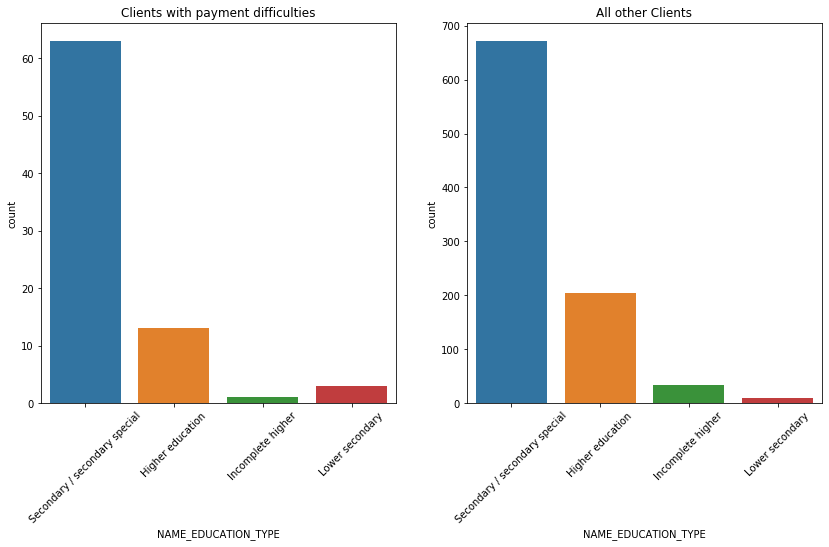

In [113]:
#Univariate analysis for NAME_EDUCATION_TYPE using countplot
plt.figure(figsize=[14,7])
plt.subplot(1,2,1)
plt.title("Clients with payment difficulties")
sns.countplot(df_1["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.title("All other Clients")
sns.countplot(df_0["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=45)
plt.show()

# Among the applicants with/without payment difficulties, the applicants whose education level is "Secondary/secondary special" are more in number compared to other education level people
# This might be becoz highly educated people would be in higher job and drawing more salaries, hence there might be more number of applicants with higher education

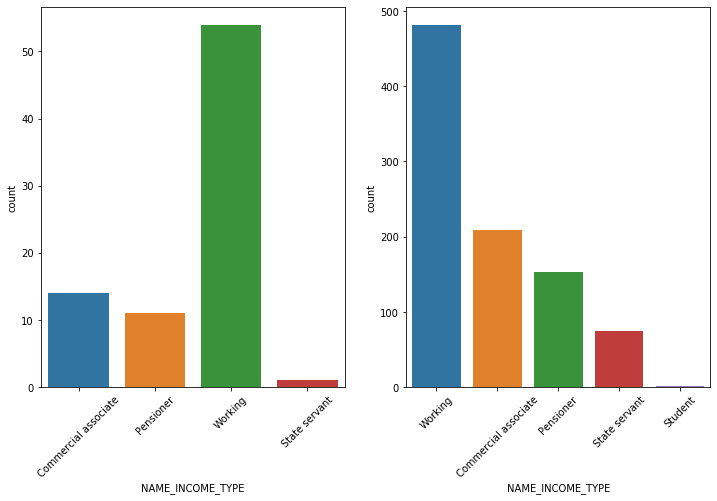

In [51]:
#Univariate analysis for NAME_INCOME_TYPE using countplot
plt.figure(figsize=[12,7])
plt.subplot(1,2,1)
sns.countplot(df_1["NAME_INCOME_TYPE"])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.countplot(df_0["NAME_INCOME_TYPE"])
plt.xticks(rotation=45)
plt.show()

# Irrespective of with/without payment difficulty From the graph is it clear that working applicants are more in number compared to other income type applicants
# where as the lest application is seens either from state-servent or the students

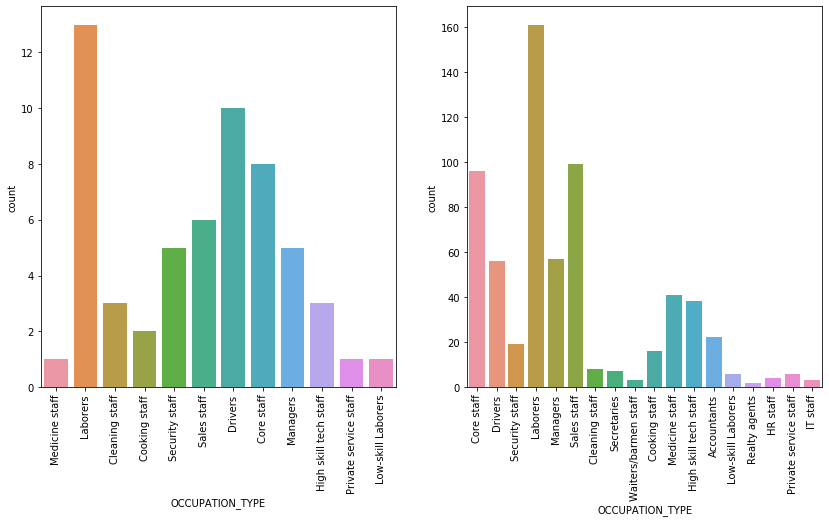

In [52]:
#Univariate analysis for OCCUPATION_TYPE using countplot
plt.figure(figsize=[14,7])
plt.subplot(1,2,1)
sns.countplot(df_1["OCCUPATION_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(df_0["OCCUPATION_TYPE"])
plt.xticks(rotation=90)
plt.show()

# There are more number of applications from the occupation type laborers, where as the next higher count is from core-staff, drivers and sales-staff.
# the other occupation-type people who has applied for the loan are comparatively less
# While its is also observed that Laborers are having payment difficulty compared to other occupation types

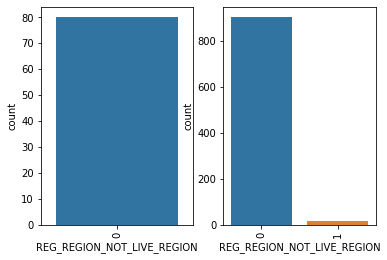

In [53]:
#Univariate analysis for REG_REGION_NOT_LIVE_REGION using countplot
plt.subplot(1,2,1)
sns.countplot(df_1["REG_REGION_NOT_LIVE_REGION"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(df_0["REG_REGION_NOT_LIVE_REGION"])
plt.xticks(rotation=90)
plt.show()

# From the graph the infarences drawn are for the applicants having payment difficulty every applicants permanent and contact address are same
# For all other applicants there are only around 2% applicats whose permanent and contact addresses are different.

### Bivariate Analysis - Continous Continuous
- CNT_FAM_MEMBERS	CNT_CHILDREN	
- AMT_GOODS_PRICE	AMT_CREDIT	
- DAYS_EMPLOYED	DAYS_BIRTH	
- AMT_CREDIT	AMT_INCOME_TOTAL

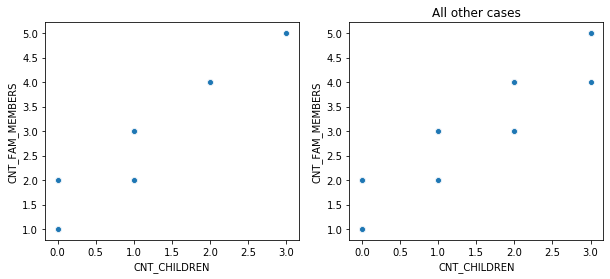

In [54]:
# Bivariate Analysis for CNT_CHILDREN v/s CNT_FAM_MEMBERS
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
sns.scatterplot(df_1['CNT_CHILDREN'], df_1['CNT_FAM_MEMBERS'])


plt.subplot(1,2,2)
plt.title("All other cases")
sns.scatterplot(df_0['CNT_CHILDREN'], df_0['CNT_FAM_MEMBERS'])

plt.show()

In [55]:
px.scatter(data_frame=df_1,x = 'CNT_FAM_MEMBERS' ,y= 'AMT_CREDIT')

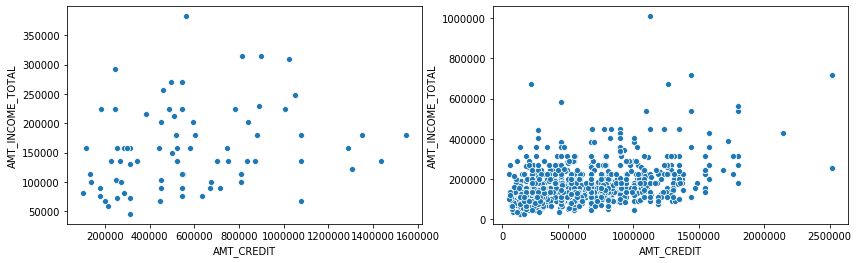

In [56]:
#Bivariate analysis for AMT_CREDIT v/s AMT_INCOME_TOTAL
plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
sns.scatterplot(data = df_1 , x = "AMT_CREDIT", y = "AMT_INCOME_TOTAL")
plt.subplot(1,2,2)
sns.scatterplot(data = df_0 , x = "AMT_CREDIT", y = "AMT_INCOME_TOTAL")
plt.show()

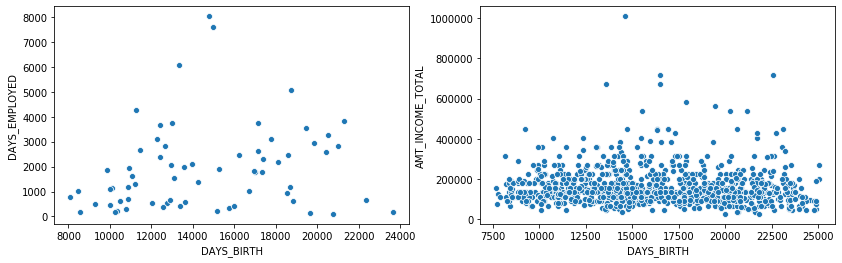

In [57]:
#Bivariate analysis for DAYS_BIRTH v/s DAYS_EMPLOYED
plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
sns.scatterplot(data = df_1 , x = "DAYS_BIRTH", y = "DAYS_EMPLOYED")
plt.subplot(1,2,2)
sns.scatterplot(data = df_0 , x = "DAYS_BIRTH", y = "AMT_INCOME_TOTAL")
plt.show()

#### Bivariate Analysis - Categorical - Categorical 
- FLAG_OWN_CAR FLAG_OWN_REALTY
- NAME_INCOME_TYPE NAME_EDUCATION_TYPE
- NAME_INCOME_TYPE FLAG_OWN_CAR
- FLAG_MOBIL FLAG_CONT_MOBILE	


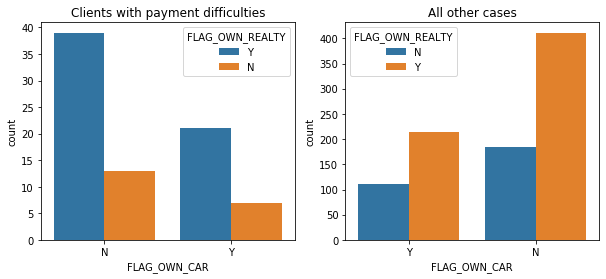

In [58]:
#Bivariate analysis for FLAG_OWN_CAR v/s FLAG_OWN_REALTY
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.countplot(data = df_1, x = "FLAG_OWN_CAR", hue = "FLAG_OWN_REALTY")

plt.subplot(1,2,2)
plt.title('All other cases')
sns.countplot(data = df_0, x = "FLAG_OWN_CAR", hue = "FLAG_OWN_REALTY")
plt.show()

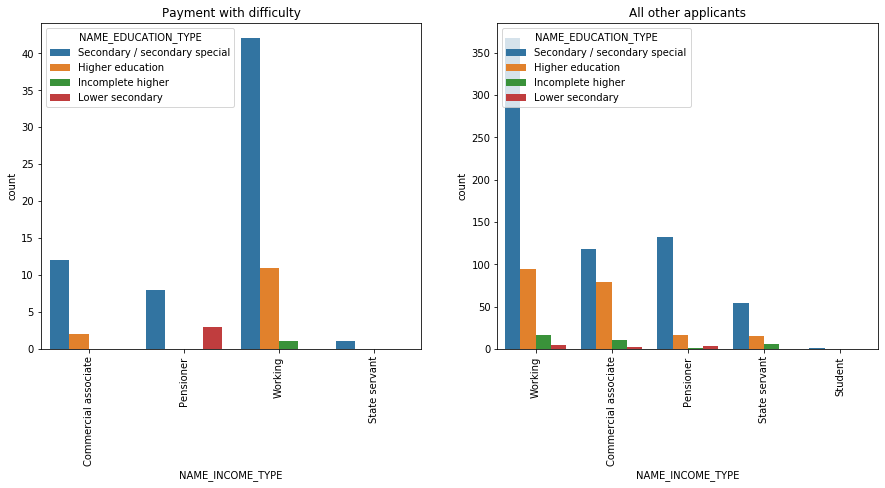

In [59]:
# Bivariate analysis for NAME_INCOME_TYPE v/s NAME_EDUCATION_TYPE
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
plt.title("Payment with difficulty")
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'NAME_EDUCATION_TYPE', data = df_1)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("All other applicants")
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'NAME_EDUCATION_TYPE', data = df_0)
plt.xticks(rotation = 90)
plt.show()

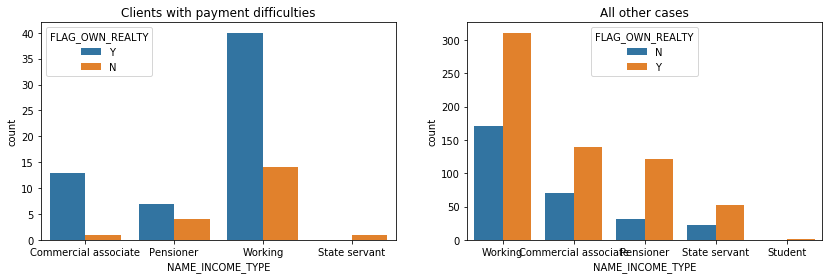

In [60]:
# Bivariate analysis for NAME_INCOME_TYPE v/s FLAG_OWN_REALTY
plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.countplot(data = df_1, x = "NAME_INCOME_TYPE", hue = "FLAG_OWN_REALTY")

plt.subplot(1,2,2)
plt.title('All other cases')
sns.countplot(data = df_0, x = "NAME_INCOME_TYPE", hue = "FLAG_OWN_REALTY")
plt.show()

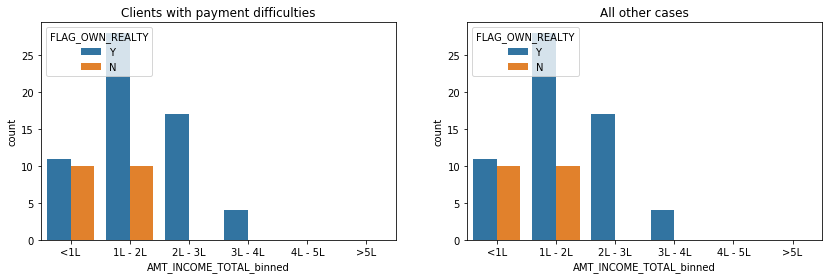

In [61]:
plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.countplot(data = df_1, x = "AMT_INCOME_TOTAL_binned", hue = "FLAG_OWN_REALTY")

plt.subplot(1,2,2)
plt.title('All other cases')
sns.countplot(data = df_1, x = "AMT_INCOME_TOTAL_binned", hue = "FLAG_OWN_REALTY")
plt.show()

### Bivariate Analysis - Continous Categorical

- AMT_INCOME_TOTAL FLAG_OWN_REALTY

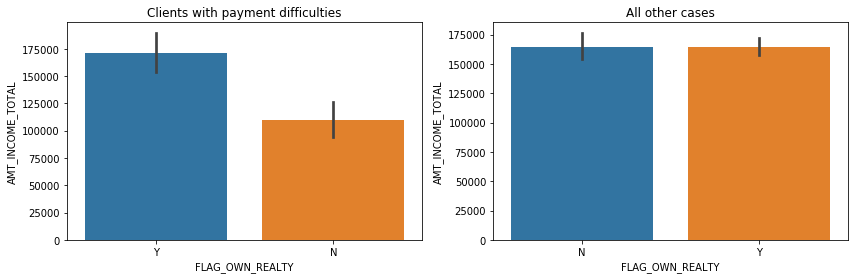

In [62]:
plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.barplot(data = df_1, x = 'FLAG_OWN_REALTY', y = 'AMT_INCOME_TOTAL')

plt.subplot(1,2,2)
plt.title('All other cases')
sns.barplot(data = df_0, x = 'FLAG_OWN_REALTY', y = 'AMT_INCOME_TOTAL')
plt.show()

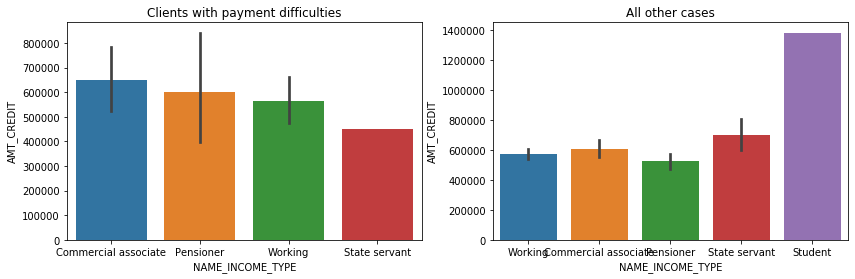

In [63]:
plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.barplot(data = df_1, x = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT')

plt.subplot(1,2,2)
plt.title('All other cases')
sns.barplot(data = df_0, x = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT')
plt.show()

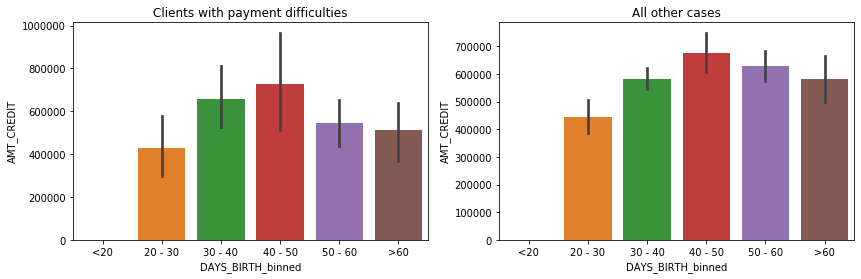

In [64]:
plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.barplot(data = df_1, x = 'DAYS_BIRTH_binned', y = 'AMT_CREDIT')

plt.subplot(1,2,2)
plt.title('All other cases')
sns.barplot(data = df_0, x = 'DAYS_BIRTH_binned', y = 'AMT_CREDIT')
plt.show()

In [65]:
p_app_data =  pd.read_csv("previous_application.csv")

In [66]:
merged_app_data= pd.merge(app_data,p_app_data, on='SK_ID_CURR',how='inner') # merging the application and previous application data tables

In [115]:
p_app_data.head()
app_data["SK_ID_CURR"] = 271877]

In [67]:
print(merged_app_data.info(verbose = True))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4440 entries, 0 to 4439
Data columns (total 116 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        int64   
 2   NAME_CONTRACT_TYPE_x          object  
 3   CODE_GENDER                   object  
 4   FLAG_OWN_CAR                  object  
 5   FLAG_OWN_REALTY               object  
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT_x                  float64 
 9   AMT_ANNUITY_x                 float64 
 10  AMT_GOODS_PRICE_x             float64 
 11  NAME_TYPE_SUITE_x             object  
 12  NAME_INCOME_TYPE              object  
 13  NAME_EDUCATION_TYPE           object  
 14  NAME_FAMILY_STATUS            object  
 15  NAME_HOUSING_TYPE             object  
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    int32   
 18  DAYS_EM

In [68]:
print("Application data csv file shape =", df.shape)
print("app_data shape =", app_data.shape) # After dropping the columns
print("Previous data csv file shape =",p_app_data.shape)
print("After merging both the files =",merged_app_data.shape) # merging app_data + previous data on SK_ID_CURR column

Application data csv file shape = (307511, 122)
app_data shape = (1000, 80)
Previous data csv file shape = (1670214, 37)
After merging both the files = (4440, 116)


In [69]:
merged_app_data.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved       0.63626
Canceled       0.17410
Refused        0.17117
Unused offer   0.01847
Name: NAME_CONTRACT_STATUS, dtype: float64

### Univariate Analysis for merged Data - Continous

In [71]:
#dividing the merged data into 4 categories 
df_Approved = merged_app_data[merged_app_data['NAME_CONTRACT_STATUS']=='Approved']
df_Canceled = merged_app_data[merged_app_data['NAME_CONTRACT_STATUS']=='Canceled']
df_Refused = merged_app_data[merged_app_data['NAME_CONTRACT_STATUS']=='Refused']
df_Unused = merged_app_data[merged_app_data['NAME_CONTRACT_STATUS']=='Unused offer']


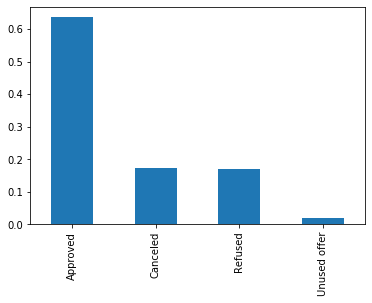

In [73]:
merged_app_data["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.bar()
plt.show()

Out of all the applications, it can be seen that only around 60% of the applications are *approved*. Rest of the applications are either *cancelled* or *rejected*

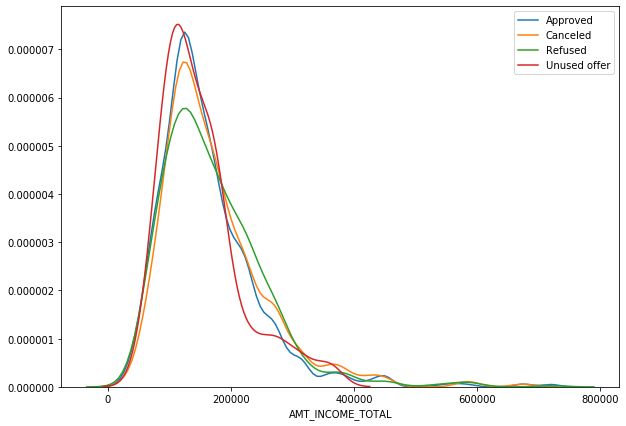

In [75]:
plt.figure(figsize=(10,7))
sns.distplot(df_Approved["AMT_INCOME_TOTAL"],hist=False,label='Approved')
sns.distplot(df_Canceled["AMT_INCOME_TOTAL"],hist=False,label='Canceled')
sns.distplot(df_Refused["AMT_INCOME_TOTAL"],hist=False,label='Refused')
sns.distplot(df_Unused["AMT_INCOME_TOTAL"],hist=False,label='Unused offer')
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()


From the above plot, we can infer that almost most of the loans are below 8 lakhs and out of them Unused are below 4 lakhs

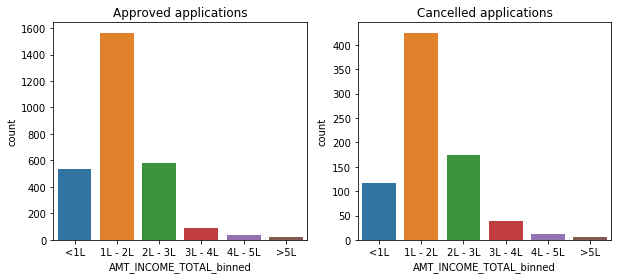

In [76]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Approved applications")
sns.countplot(x = "AMT_INCOME_TOTAL_binned", data = df_Approved)
plt.subplot(1,2,2)
plt.title("Cancelled applications")
sns.countplot(x = "AMT_INCOME_TOTAL_binned", data = df_Canceled)
plt.show()
# Clients with payment difficluties have incomes in the range of 0 to 4 Lakhs,
# where all other cleints varied salaries, but most of them lie in 1L - 2L range

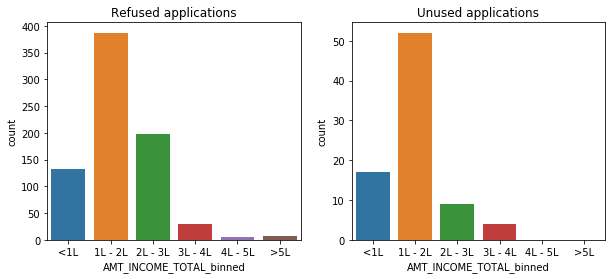

In [77]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Refused applications")
sns.countplot(x = "AMT_INCOME_TOTAL_binned", data = df_Refused)
plt.subplot(1,2,2)
plt.title("Unused applications")
sns.countplot(x = "AMT_INCOME_TOTAL_binned", data = df_Unused)
plt.show()

After looking at the approved, refused and cancelled applications from income range,Most of the loan applicants are people with income less than 2 Lakhs

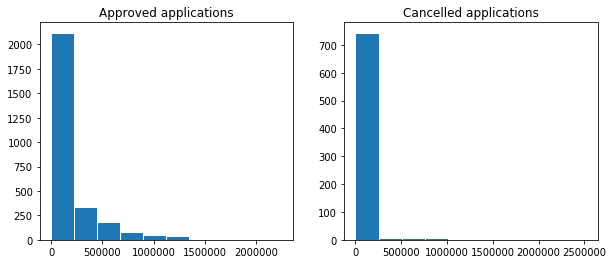

In [79]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Approved applications")
plt.hist(df_Approved["AMT_CREDIT_y"], edgecolor = 'white')
plt.subplot(1,2,2)
plt.title("Cancelled applications")
plt.hist(df_Canceled["AMT_CREDIT_y"], edgecolor = 'white')
plt.show()

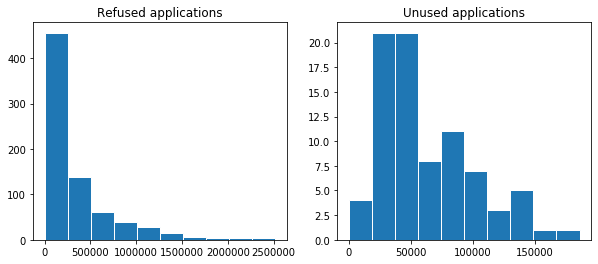

In [80]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Refused applications")
plt.hist(df_Refused["AMT_CREDIT_y"], edgecolor = 'white')
plt.subplot(1,2,2)
plt.title("Unused applications")
plt.hist(df_Unused["AMT_CREDIT_y"], edgecolor = 'white')
plt.show()

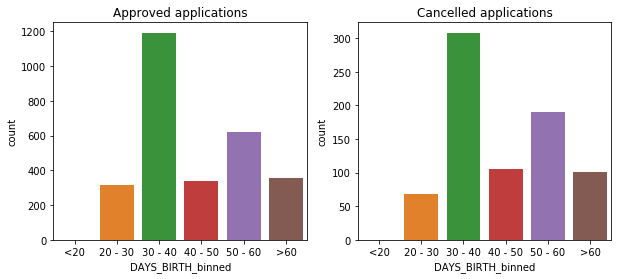

In [81]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Approved applications")
sns.countplot(x = "DAYS_BIRTH_binned", data = df_Approved)
plt.subplot(1,2,2)
plt.title("Cancelled applications")
sns.countplot(x = "DAYS_BIRTH_binned", data = df_Canceled)
plt.show()

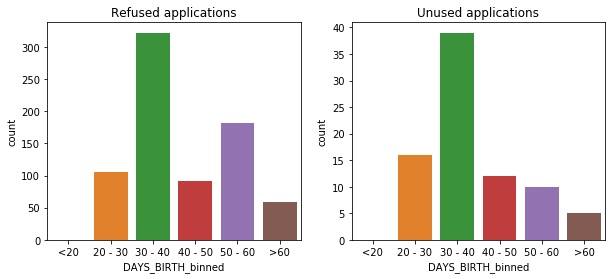

In [82]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Refused applications")
sns.countplot(x = "DAYS_BIRTH_binned", data = df_Refused)
plt.subplot(1,2,2)
plt.title("Unused applications")
sns.countplot(x = "DAYS_BIRTH_binned", data = df_Unused)
plt.show()

people with age 30 - 40 are the poeple who are applying for loans, followed by 50 - 60 age group

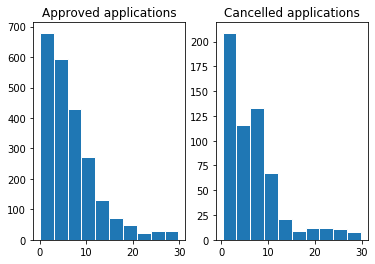

In [83]:
df_Approved["DAYS_EMPLOYED"] = df_Approved["DAYS_EMPLOYED"].apply(lambda x : np.NaN if x/365 > 30 else x)
df_Canceled["DAYS_EMPLOYED"] = df_Canceled["DAYS_EMPLOYED"].apply(lambda x : np.NaN if x/365 > 30 else x)
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.title("Approved applications")
plt.hist(df_Approved["DAYS_EMPLOYED"]/365, edgecolor = 'white')
plt.subplot(1,2,2)
plt.title("Cancelled applications")
plt.hist(df_Canceled["DAYS_EMPLOYED"]/365, edgecolor= 'white')
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

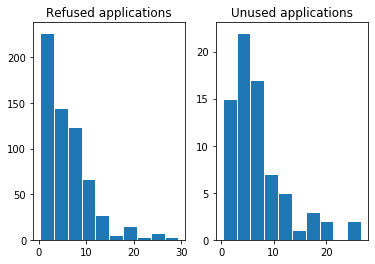

In [84]:
df_Refused["DAYS_EMPLOYED"] = df_Refused["DAYS_EMPLOYED"].apply(lambda x : np.NaN if x/365 > 30 else x)
df_Unused["DAYS_EMPLOYED"] = df_Unused["DAYS_EMPLOYED"].apply(lambda x : np.NaN if x/365 > 30 else x)
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.title("Refused applications")
plt.hist(df_Refused["DAYS_EMPLOYED"]/365, edgecolor = 'white')
plt.subplot(1,2,2)
plt.title("Unused applications")
plt.hist(df_Unused["DAYS_EMPLOYED"]/365, edgecolor= 'white')
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

For the early professionals who have 10 years of experience, the loan approval rate is more compared to other experince range

### Univariate Categorical for merged Data

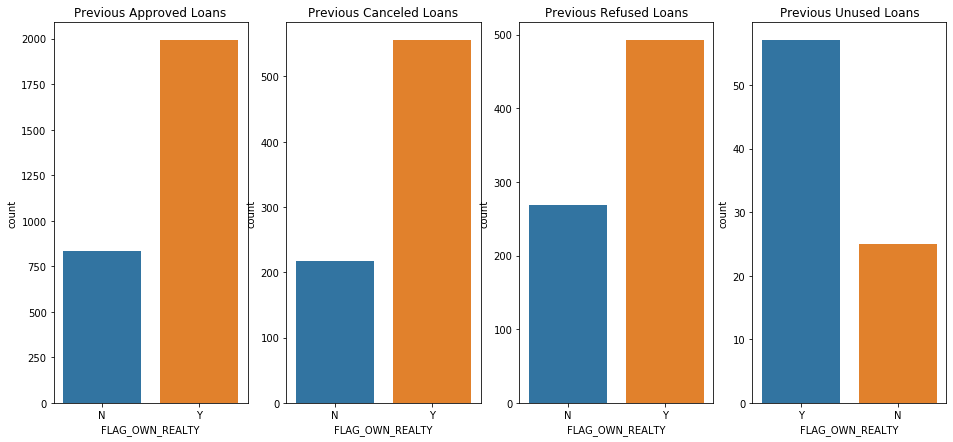

In [85]:
plt.figure(figsize=(16,7))
plt.subplot(1,4,1)
plt.title("Previous Approved Loans")
sns.countplot(df_Approved["FLAG_OWN_REALTY"])
plt.subplot(1,4,2)
plt.title("Previous Canceled Loans")
sns.countplot(df_Canceled["FLAG_OWN_REALTY"])
plt.subplot(1,4,3)
plt.title("Previous Refused Loans")
sns.countplot(df_Refused["FLAG_OWN_REALTY"])
plt.subplot(1,4,4)
plt.title("Previous Unused Loans")
sns.countplot(df_Unused["FLAG_OWN_REALTY"])
plt.show()

It is observed that most of the applicants have a own house

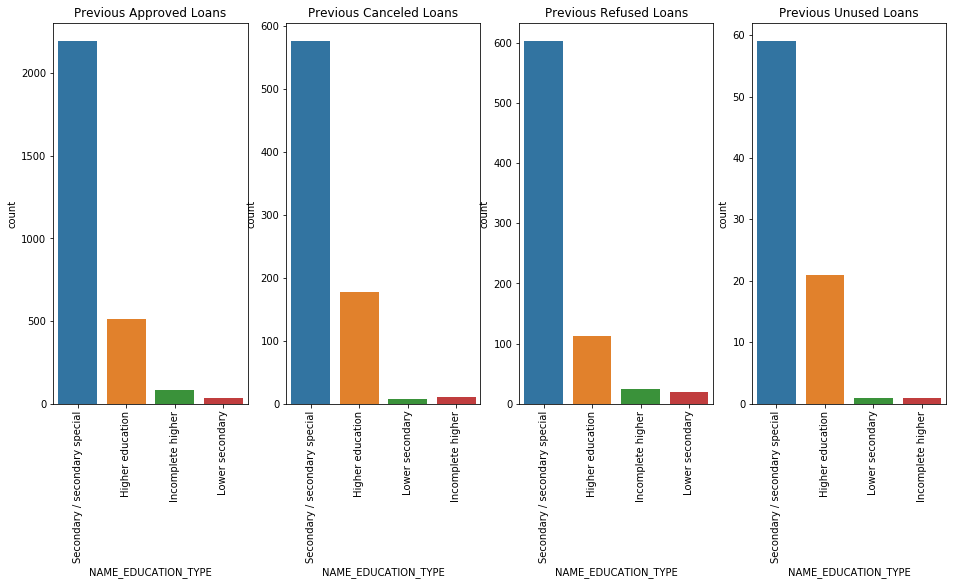

In [86]:
plt.figure(figsize=(16,7))
plt.subplot(1,4,1)
plt.title("Previous Approved Loans")
sns.countplot(df_Approved["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1,4,2)
plt.title("Previous Canceled Loans")
sns.countplot(df_Canceled["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1,4,3)
plt.title("Previous Refused Loans")
sns.countplot(df_Refused["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1,4,4)
plt.title("Previous Unused Loans")
sns.countplot(df_Unused["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=90)
plt.show()

# 

It can be observed that most of the applicants have secondary / secondary special education

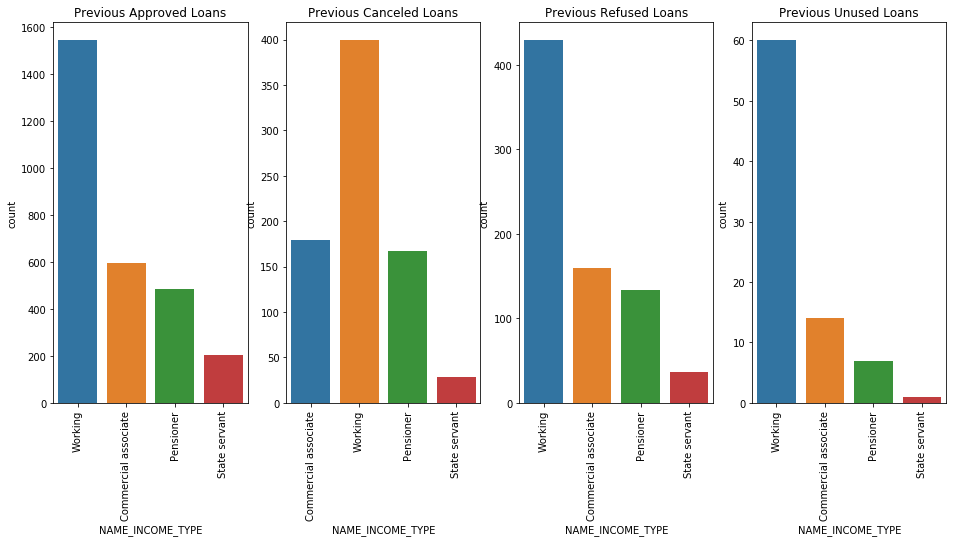

In [87]:
plt.figure(figsize=(16,7))
plt.subplot(1,4,1)
plt.title("Previous Approved Loans")
sns.countplot(df_Approved["NAME_INCOME_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1,4,2)
plt.title("Previous Canceled Loans")
sns.countplot(df_Canceled["NAME_INCOME_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1,4,3)
plt.title("Previous Refused Loans")
sns.countplot(df_Refused["NAME_INCOME_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1,4,4)
plt.title("Previous Unused Loans")
sns.countplot(df_Unused["NAME_INCOME_TYPE"])
plt.xticks(rotation=90)
plt.show()

The loan getting approved rate was more for State servants applicants, whereas the rest other income type applicant have almost similar approval rate(around 60%)

NAME_INCOME_TYPE      NAME_CONTRACT_STATUS
Commercial associate  Approved               0.62724
                      Canceled               0.18902
                      Refused                0.16895
                      Unused offer           0.01478
Pensioner             Approved               0.61111
                      Canceled               0.21086
                      Refused                0.16919
                      Unused offer           0.00884
State servant         Approved               0.75646
                      Refused                0.13653
                      Canceled               0.10332
                      Unused offer           0.00369
Working               Approved               0.63457
                      Refused                0.17654
                      Canceled               0.16420
                      Unused offer           0.02469
Name: NAME_CONTRACT_STATUS, dtype: float64


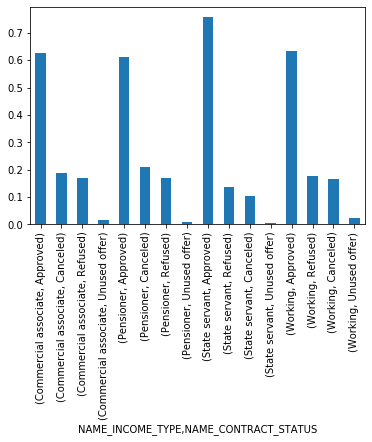

In [101]:
(merged_app_data.groupby("NAME_INCOME_TYPE")["NAME_CONTRACT_STATUS"].value_counts(normalize=True)).plot.bar()
print(merged_app_data.groupby("NAME_INCOME_TYPE")["NAME_CONTRACT_STATUS"].value_counts(normalize=True))

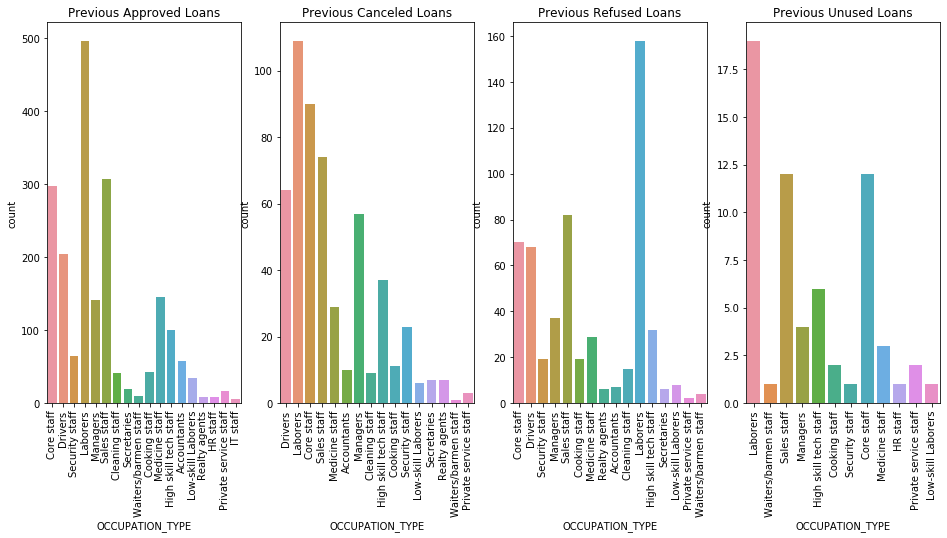

In [89]:
plt.figure(figsize=(16,7))
plt.subplot(1,4,1)
plt.title("Previous Approved Loans")
sns.countplot(df_Approved["OCCUPATION_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1,4,2)
plt.title("Previous Canceled Loans")
sns.countplot(df_Canceled["OCCUPATION_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1,4,3)
plt.title("Previous Refused Loans")
sns.countplot(df_Refused["OCCUPATION_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1,4,4)
plt.title("Previous Unused Loans")
sns.countplot(df_Unused["OCCUPATION_TYPE"])
plt.xticks(rotation=90)
plt.show()

# From the graph we can infer that the rate of loan getting approved is more for laborers and while getting cancelled and refused is alos more

OCCUPATION_TYPE        NAME_CONTRACT_STATUS
Accountants            Approved               0.77027
                       Canceled               0.13514
                       Refused                0.09459
Cleaning staff         Approved               0.63077
                       Refused                0.23077
                       Canceled               0.13846
Cooking staff          Approved               0.57333
                       Refused                0.25333
                       Canceled               0.14667
                       Unused offer           0.02667
Core staff             Approved               0.63326
                       Canceled               0.19190
                       Refused                0.14925
                       Unused offer           0.02559
Drivers                Approved               0.60714
                       Refused                0.20238
                       Canceled               0.19048
HR staff               Approved       

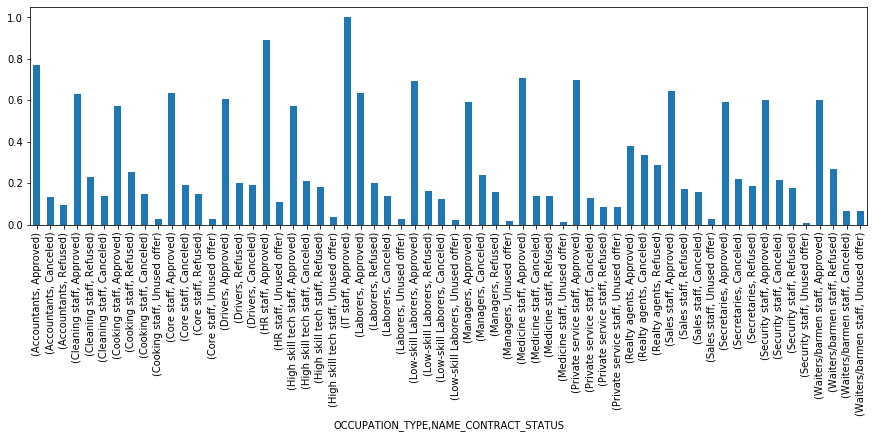

In [104]:
plt.figure(figsize=(15,4))
(merged_app_data.groupby("OCCUPATION_TYPE")["NAME_CONTRACT_STATUS"].value_counts(normalize=True)).plot.bar()
print(merged_app_data.groupby("OCCUPATION_TYPE")["NAME_CONTRACT_STATUS"].value_counts(normalize=True))

We observe that clients who work as It staff, HR staff, Accountants, Medicine staff have more approval rate. 
Particularly, IT staff have 100% approval
In general, we can say clients in IT industry have more approval rate

### Merged data Bivariate Analysis - Contious Continous

In [91]:
px.scatter(data_frame=merged_app_data,x = 'CNT_FAM_MEMBERS' ,y= 'AMT_CREDIT_y', color = 'NAME_CONTRACT_STATUS')

As the count of family members increases, amount credit is less i.e, less amount is approved for the application which has more family members

In [92]:
px.scatter(data_frame=merged_app_data,x = 'AMT_INCOME_TOTAL' ,y= 'AMT_CREDIT_y', color = 'NAME_CONTRACT_STATUS')

- Loan applications with credit amount below 3 Lakhs are more approved irrespective of the annual income.
- Loan applications are more refused for clients with annual income below 4 Lakhs i.e, loans for clients with high income is easily approved
- Clients with less income(less than 3 Lakhs) are cancelling their loans more frequently compared with high income clients 

In [105]:
px.scatter(data_frame=merged_app_data,x = 'DEF_60_CNT_SOCIAL_CIRCLE' ,y= 'AMT_CREDIT_y', color = 'NAME_CONTRACT_STATUS')

- Approval rate is less for clients,If the number of defaulters(60 DPD) in their social circle is more. Even for the loan approved cases, the credit amount is less(below 5 Lakhs observed from the plot)

### Merged data Bivariate Analysis - Categorical Categorical

In [94]:
px.sunburst(merged_app_data, path=['NAME_CONTRACT_STATUS','NAME_CASH_LOAN_PURPOSE'])

Tried to check what purpose of loans are approved more or refused more. 
Purpose is not mentioned in the loan application for most of the applications

In [106]:
px.sunburst(merged_app_data, path=['NAME_CONTRACT_STATUS','NAME_EDUCATION_TYPE'])

In [108]:
px.sunburst(merged_app_data, path=['NAME_CONTRACT_STATUS','CODE_REJECT_REASON'])

- Most of the loans rejected have rejection reason as HC(Higher Credit) - around 60% 
- Around 20% of rejections are due to Credit Limit

### Merged data Bivariate Analysis - Categorical Continous

In [97]:
p_app_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

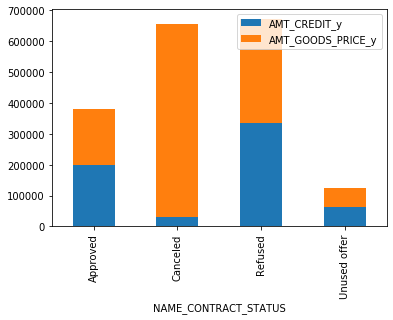

In [98]:
merged_app_data.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT_y','AMT_GOODS_PRICE_y'].mean().plot.bar(stacked = True)
plt.show()

In [111]:
px.scatter(data_frame=merged_app_data, x = 'DAYS_DECISION',y = 'AMT_CREDIT_y', color = 'NAME_CONTRACT_STATUS')

- Clients who have taken a loan 1 - 2 years prior to the current application are cancelling thier loans more.
- Refusal rate is more for clients who already took a loan 1 or 2 years ago. (If previous loan is taken 1 or 2 years ago, it is more likely that the loan is still active and the client is applying for another loan)